# **What does developers say?**

**I have used data from StackOverflow 2017 Annual Developers Survey, to get a closer look at the questions.
The survey data covers 64,000 reviews from 213 countries and territories. The survey aims to understand multiple aspects of jobs related to software development and data analytics. There were more than 150 questions.**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/kaggle/input/so-survey-2017/survey_results_schema.csv
/kaggle/input/so-survey-2017/survey_results_public.csv


In [3]:
df = pd.read_csv('../input/so-survey-2017/survey_results_public.csv')
survey_sch = pd.read_csv('../input/so-survey-2017/survey_results_schema.csv')

Here's the list of questions asked.

In [4]:
survey_sch

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [5]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [6]:
#Columns having more than 75% of missing value
print(df.columns[df.isnull().mean()>0.75].to_list())
print('\n The no. of comlumn with more than 75% of missing values',len(df.columns[df.isnull().mean()>0.75].to_list()))

['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary']

 The no. of comlumn with more than 75% of missing values 14


# **What stuff developers recommend for learning?**

![](http://)Let's take a look of the education option opted by the developers.

In [7]:
edu_type = df['EducationTypes'].value_counts().reset_index()
edu_type.head()

,index,EducationTypes
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [8]:
#First of all let's clean the data
#Here we are no dealing with any null value as it will automatically not be considered

def clean_series(df,col_name):
    """
    inputs: 
    df: dataframe which you want to manipulate
    col_name: name of the column which you want to clean the data
    
    outputs:
    df2: Panda's dataframe with the unique element seperated and
         their count
    """
    temp = df[col_name]
    temp = temp.dropna().reset_index()
    temp = temp[col_name].str.split(';')
    emp_list=[]
    for i in range(len(temp)):
        emp_list += temp[i]

    for i in range(len(emp_list)):
        emp_list[i] = emp_list[i].strip()

    emp_set = list(set(emp_list))    
    emp_set

    c = Counter(emp_list)
    print(c.items())
    df2 = pd.DataFrame({'Methods':list(c.keys()),'Counts':list(c.values())})
    
    return df2

In [9]:
methods = clean_series(df,'EducationTypes').sort_values(by='Counts')
methods

dict_items([('Online course', 13792), ('Open source contributions', 11225), ('Self-taught', 27330), ('Hackathon', 7150), ('Coding competition', 6683), ('Part-time/evening course', 4654), ('On-the-job training', 12508), ('Bootcamp', 2727), ('Industry certification', 4472)])


,Methods,Counts
7,Bootcamp,2727
8,Industry certification,4472
5,Part-time/evening course,4654
4,Coding competition,6683
3,Hackathon,7150
1,Open source contributions,11225
6,On-the-job training,12508
0,Online course,13792
2,Self-taught,27330


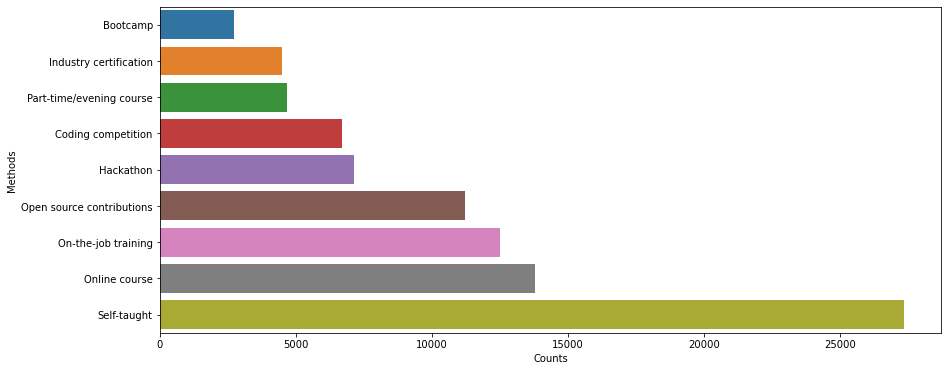

In [10]:
plt.figure(figsize=(14,6))
sns.barplot(data = methods , y = 'Methods',x = 'Counts',)

From the plot it is clear that majority of developers self taught themselves.
Self-taught in itself is a very broad term, it combine of various self teaching techniques. Let's break it down a bit more.

In [11]:
self_type = df['SelfTaughtTypes']
self_type.head()

0                                                  NaN
1    Official documentation; Stack Overflow Q&A; Other
2    Official documentation; Trade book; Textbook; ...
3                                                  NaN
4                                                  NaN
Name: SelfTaughtTypes, dtype: object

In [12]:
#Let's use the function created before for seperating the categorical values and count the no. of occurence

method_self = clean_series(df,'SelfTaughtTypes').sort_values(by='Counts')
method_self['percentage'] = (method_self['Counts']/np.sum(method_self['Counts']))*100
method_self


dict_items([('Official documentation', 21434), ('Stack Overflow Q&A', 21409), ('Other', 3129), ('Trade book', 14389), ('Textbook', 5558), ('Non-Stack online communities', 13546), ('Company internal community', 4947), ('Friends network', 5537), ('Built-in help', 12585), ('Stack Overflow Docs', 7348), ('Tutoring/mentoring', 1164)])


,Methods,Counts,percentage
10,Tutoring/mentoring,1164,1.048214
2,Other,3129,2.817751
6,Company internal community,4947,4.454911
7,Friends network,5537,4.986222
4,Textbook,5558,5.005133
9,Stack Overflow Docs,7348,6.617078
8,Built-in help,12585,11.333141
5,Non-Stack online communities,13546,12.198548
3,Trade book,14389,12.957693
1,Stack Overflow Q&A,21409,19.279398


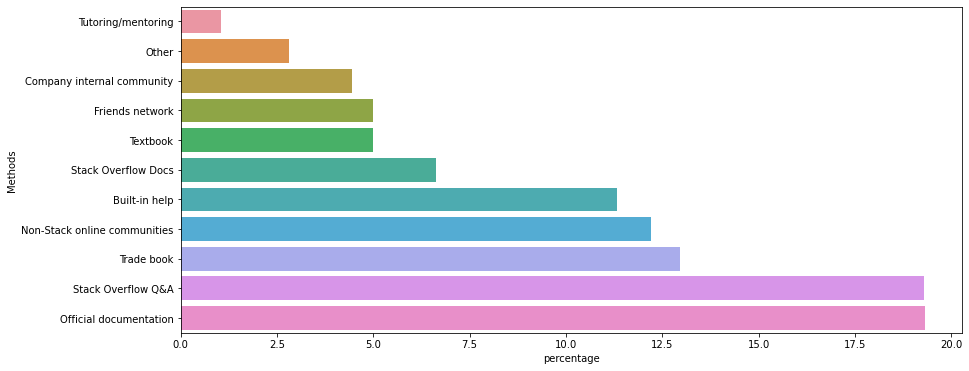

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(data = method_self , y = 'Methods',x = 'percentage',)

So far we vizualize what are methods of educations of the developers and what method they use for self teaching.

# **Let's take a look at what recommendation they give to someone who is trying to break into the field.**

In [14]:
# The question asked to the developers during the survey
list(survey_sch[survey_sch.Column =='CousinEducation']['Question'])

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [15]:
#Let's have a look at what the participants say
study = df['CousinEducation'].value_counts().reset_index()
study.head()

,index,CousinEducation
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [16]:
#Let's apply the function defined ealier to count occurence of unique responses

method_study = clean_series(df,'CousinEducation').sort_values(by='Counts')
method_study['percentage'] = (method_study['Counts']/np.sum(method_study['Counts']))*100
method_study

# method_study = df['CousinEducation']
# method_study = method_study.dropna().reset_index()
# method_study = method_study['CousinEducation'].str.split(';')
# emp_list=[]
# for i in range(len(method_study)):
#     emp_list += method_study[i]
    
# for i in range(len(emp_list)):
#     emp_list[i] = emp_list[i].strip()

# emp_set = list(set(emp_list))    
# emp_set

# c = Counter(emp_list)
# print(c.items()))


dict_items([('Get a job as a QA tester', 3376), ('Conferences/meet-ups', 5244), ('Take online courses', 15246), ('Contribute to open source', 7423), ('Buy books and work through the exercises', 11750), ('Other', 2348), ('Part-time/evening courses', 7517), ('Participate in online coding competitions', 3610), ('None of these', 604), ('Bootcamp', 5276), ("Master's degree", 2639), ('Return to college', 5017), ('Participate in hackathons', 2747)])


,Methods,Counts,percentage
8,None of these,604,0.829705
5,Other,2348,3.225408
10,Master's degree,2639,3.625149
12,Participate in hackathons,2747,3.773507
0,Get a job as a QA tester,3376,4.637554
7,Participate in online coding competitions,3610,4.958996
11,Return to college,5017,6.891768
1,Conferences/meet-ups,5244,7.203594
9,Bootcamp,5276,7.247551
3,Contribute to open source,7423,10.196849


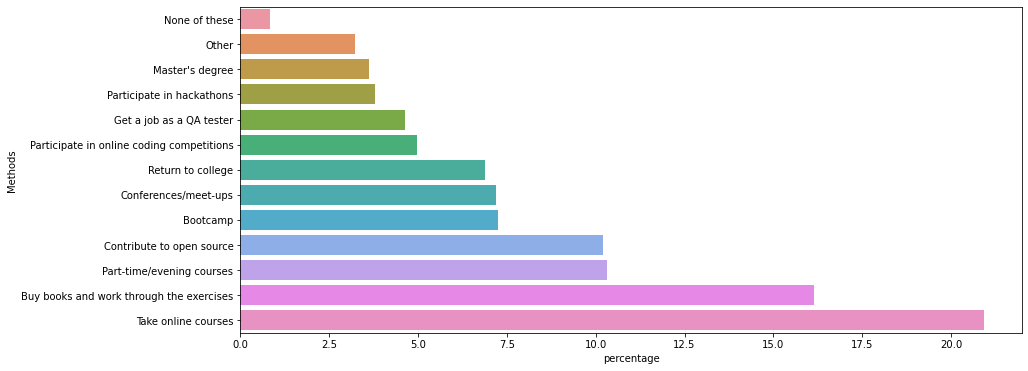

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(data = method_study , y = 'Methods',x = 'percentage',)

# **Languages "You know" Vs "You should"**

Let's take a look at what the participant prefer to know or know, and what are the language prefered by the industries.

In [18]:
lang_work = df['HaveWorkedLanguage'].value_counts().reset_index()
lang_work.head()

,index,HaveWorkedLanguage
0,C#; JavaScript; SQL,1276
1,JavaScript; PHP; SQL,1143
2,Java,913
3,JavaScript,807
4,JavaScript; PHP,662


In [19]:
lang_work = clean_series(df,'HaveWorkedLanguage').sort_values(by='Counts')
lang_work.columns = ['Language','CountsWork']
lang_work.head()

dict_items([('Swift', 2368), ('JavaScript', 22875), ('Python', 11704), ('Ruby', 3324), ('SQL', 18754), ('Java', 14524), ('PHP', 10290), ('Matlab', 1569), ('R', 1634), ('Rust', 416), ('CoffeeScript', 1192), ('Clojure', 391), ('Elixir', 380), ('Erlang', 281), ('Haskell', 649), ('C#', 12476), ('Objective-C', 2349), ('C', 6974), ('C++', 8155), ('Assembly', 1823), ('VB.NET', 2273), ('Perl', 1585), ('Scala', 1309), ('F#', 457), ('TypeScript', 3488), ('Lua', 1039), ('VBA', 1574), ('Groovy', 1193), ('Go', 1557), ('Smalltalk', 327), ('Visual Basic 6', 1071), ('Common Lisp', 273), ('Dart', 145), ('Julia', 138), ('Hack', 107)])


,Language,CountsWork
34,Hack,107
33,Julia,138
32,Dart,145
31,Common Lisp,273
13,Erlang,281


In [20]:
lang_want = df['WantWorkLanguage'].value_counts().reset_index()
lang_want.head()

,index,WantWorkLanguage
0,JavaScript,642
1,Python,556
2,Java,544
3,C#,475
4,C#; JavaScript; SQL,444


In [21]:
lang_want = clean_series(df,'WantWorkLanguage').sort_values(by='Counts')
lang_want.columns = ['Language','CountsWant']
lang_want.head()

dict_items([('Swift', 4530), ('Java', 9988), ('Python', 12570), ('Ruby', 3966), ('SQL', 11217), ('C', 4841), ('Rust', 2718), ('Matlab', 931), ('R', 2628), ('Clojure', 1308), ('Elixir', 1565), ('Erlang', 1053), ('Haskell', 2306), ('TypeScript', 5692), ('JavaScript', 16327), ('Julia', 515), ('Scala', 3122), ('F#', 2034), ('Go', 5770), ('C#', 10187), ('Objective-C', 1844), ('Assembly', 1923), ('C++', 7647), ('VB.NET', 804), ('Perl', 1089), ('Hack', 338), ('PHP', 5365), ('Lua', 1117), ('Groovy', 866), ('CoffeeScript', 1032), ('Common Lisp', 647), ('Dart', 496), ('Smalltalk', 421), ('VBA', 445), ('Visual Basic 6', 295)])


,Language,CountsWant
34,Visual Basic 6,295
25,Hack,338
32,Smalltalk,421
33,VBA,445
31,Dart,496


In [22]:
#First of all lets normalize the data to visualize and compare more clearly
#Defining a normalization function, to normalize the data

def norm(df,col_name):
    """
    input:
    df: The dataframe storing the data to be normalize
    col_name: Name of the column in which the data is stored
    
    output:
    df2: Dataframe with normalize data
    """
    df[col_name] = (df[col_name] - df[col_name].mean()) / (df[col_name].max() - df[col_name].min())
    pass

In [23]:
#Normalizing the HaveWorkLanguage Data
norm(lang_work,'CountsWork')
lang_work = lang_work.sort_values(by='Language').reset_index().drop('index',axis=1)
lang_work.head()

,Language,CountsWork
0,Assembly,-0.093940
1,C,0.132298
2,C#,0.373953
3,C++,0.184170
4,Clojure,-0.156835


In [24]:
#Normalizing the WantWorkLanguage Data
norm(lang_want,'CountsWant')
lang_want = lang_want.sort_values(by='Language').reset_index().drop('index',axis=1)
lang_want.head()

,Language,CountsWant
0,Assembly,-0.107449
1,C,0.074562
2,C#,0.408020
3,C++,0.249587
4,Clojure,-0.145810


In [25]:
language = pd.concat([lang_want,lang_work],axis=1)
language = language.loc[:,~language.columns.duplicated()]
language.head()

,Language,CountsWant,CountsWork
0,Assembly,-0.107449,-0.093940
1,C,0.074562,0.132298
2,C#,0.408020,0.373953
3,C++,0.249587,0.184170
4,Clojure,-0.145810,-0.156835


<Figure size 864x1080 with 0 Axes>

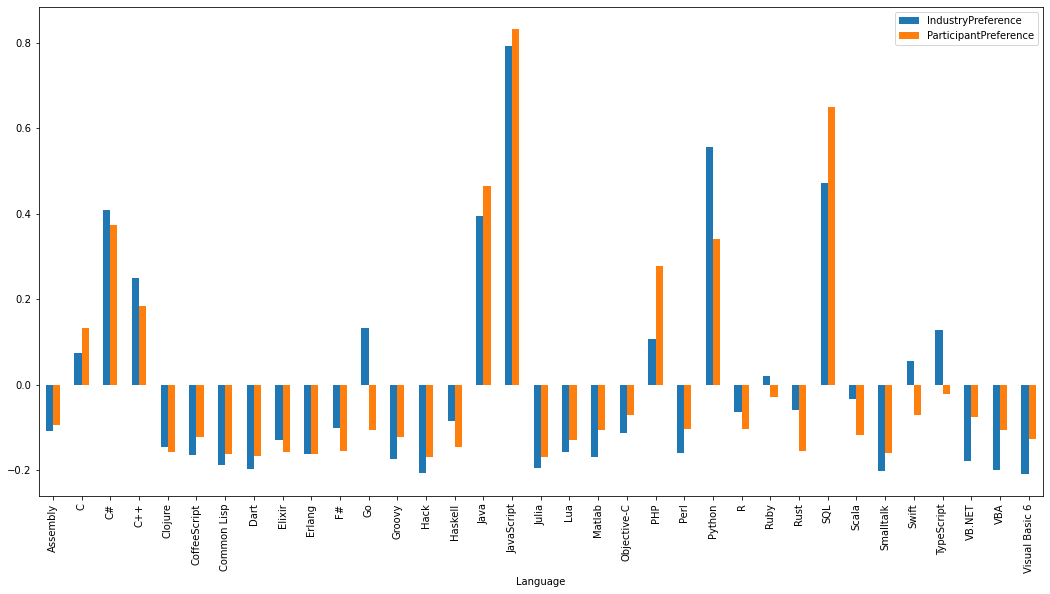

In [26]:
#Now let's create a barplot comparing both parameters
# lang_work.join(lang_want,on = 'Language')
language.columns = ['Language','IndustryPreference','ParticipantPreference']
plt.figure(figsize=(12,15))
language.plot(kind="bar",figsize=(18,9),x='Language')


# **Salary vs Job satisfaction**

**First take a look at the demographics of the participants of the survey**

In [27]:
#The function defined below labels the horizontal bar with their size/width
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

,Country,Participants
0,United States,11455
1,India,5197
2,United Kingdom,4395
3,Germany,4143
4,Canada,2233


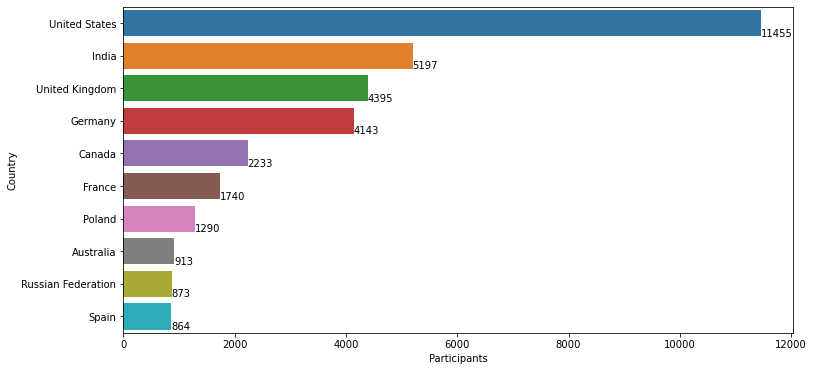

In [28]:
country = df['Country'].value_counts().reset_index()
country.columns = ['Country','Participants']
plt.figure(figsize=(12,6))
bar = sns.barplot(data=country.head(10),y ='Country',x = 'Participants')
# for index, row in country.head(10).iterrows():
#     bar.text(row.tip,row.name, round(row.Country,2), color='black', ha="center")
show_values_on_bars(bar, "h", 0.3)
country.head()

**Employement Status of the participants**

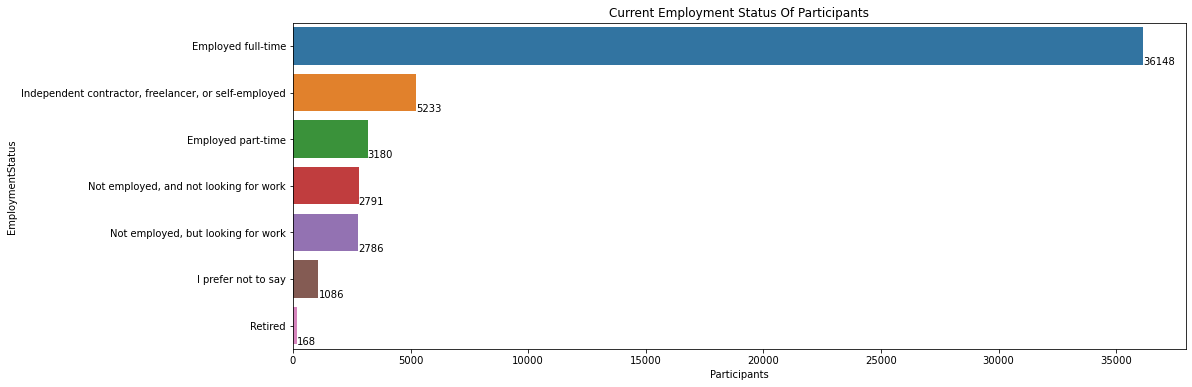

In [29]:
emp_status = df['EmploymentStatus'].value_counts().reset_index()
emp_status.columns = ['EmploymentStatus','Participants']
plt.figure(figsize=(16,6))
plt.title("Current Employment Status Of Participants")
bar = sns.barplot(data = emp_status,x = 'Participants',y = 'EmploymentStatus')
show_values_on_bars(bar, "h", 0.3)

** Highest formal education degree of the developers**

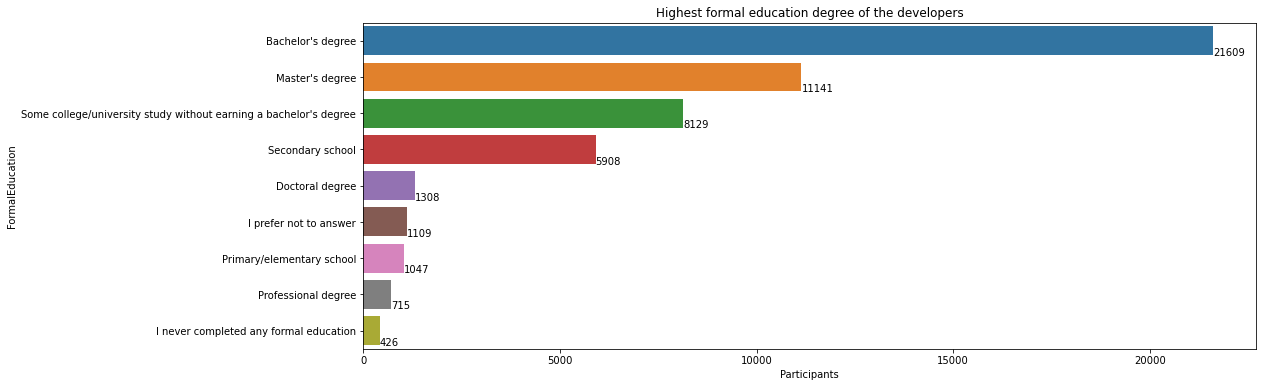

In [30]:
edu_status = df['FormalEducation'].value_counts().reset_index()
edu_status.columns = ['FormalEducation','Participants']
plt.figure(figsize=(16,6))
plt.title("Highest formal education degree of the developers")
bar = sns.barplot(data = edu_status,x = 'Participants',y = 'FormalEducation')
show_values_on_bars(bar, "h", 0.3)

**Now, Let's take a look at developers Career Satisfaction**

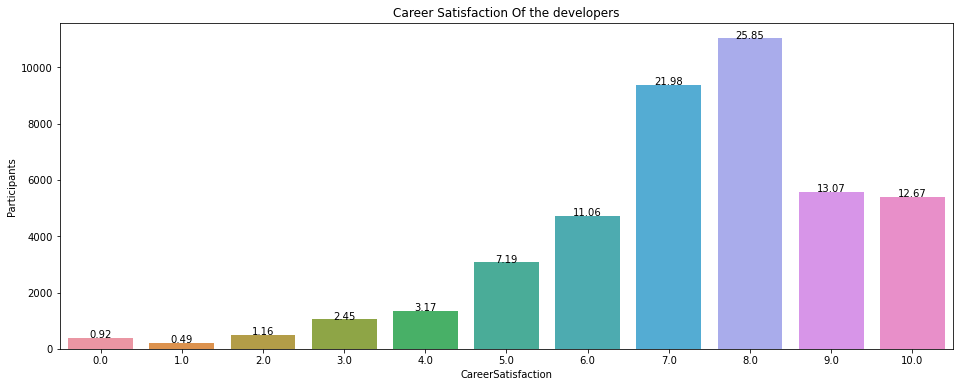

In [31]:
career_sat = df['CareerSatisfaction'].value_counts().reset_index()
career_sat.columns = ['CareerSatisfaction','Participants']
career_sat = career_sat.sort_values(by='CareerSatisfaction').reset_index()
career_sat['per'] = (career_sat['Participants']/np.sum(career_sat['Participants']))*100
plt.figure(figsize=(16,6))
plt.title("Career Satisfaction Of the developers")
bar = sns.barplot(data = career_sat,y = 'Participants',x = 'CareerSatisfaction')
for index, row in career_sat.iterrows():
    bar.text(row.name,row.Participants, round(row.per,2), color='black', ha="center")

**Salary of the participants**

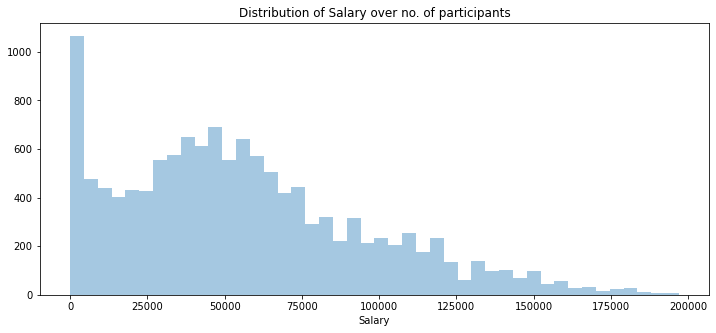

In [32]:
salary = df['Salary']
salary = salary.dropna()
salary = salary.reset_index()
salary
plt.figure(figsize=(12,5))
plt.title("Distribution of Salary over no. of participants")
sns.distplot(a=df['Salary'], kde=False)


**Developer's current job satisfaction**

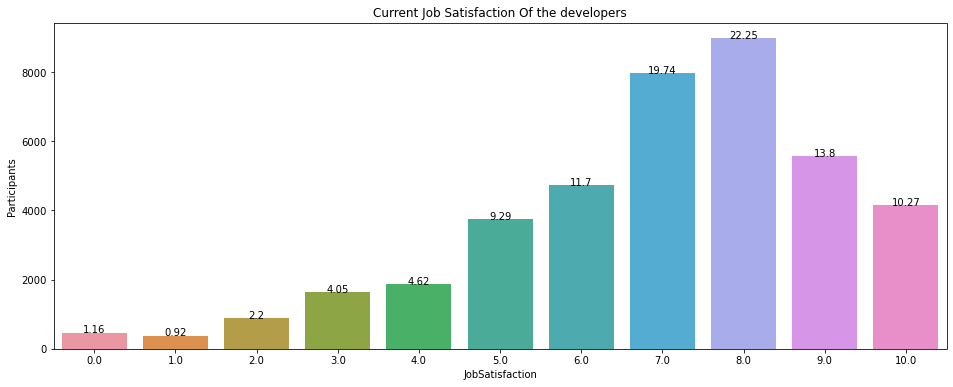

In [33]:
job_sat = df['JobSatisfaction'].value_counts().reset_index()
job_sat.columns = ['JobSatisfaction','Participants']
job_sat = job_sat.sort_values(by='JobSatisfaction').reset_index()
job_sat['per'] = (job_sat['Participants']/np.sum(job_sat['Participants']))*100
plt.figure(figsize=(16,6))
plt.title("Current Job Satisfaction Of the developers")
bar = sns.barplot(data = job_sat,y = 'Participants',x = 'JobSatisfaction')

#This code is for labeling the bars with the percentage
for index, row in job_sat.iterrows():
    bar.text(row.name,row.Participants, round(row.per,2), color='black', ha="center")

We'll try to find the salary distribution over job satisfaction

<Figure size 864x360 with 0 Axes>

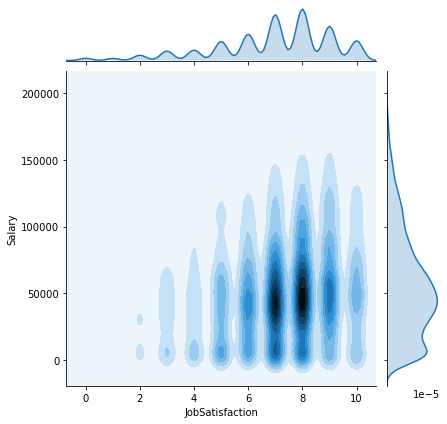

In [36]:
plt.figure(figsize=(12,5))
sns.jointplot(x= df['JobSatisfaction'],y=df['Salary'],kind='kde')

**Let's take a look, how many developers are currently seeking for jobs**

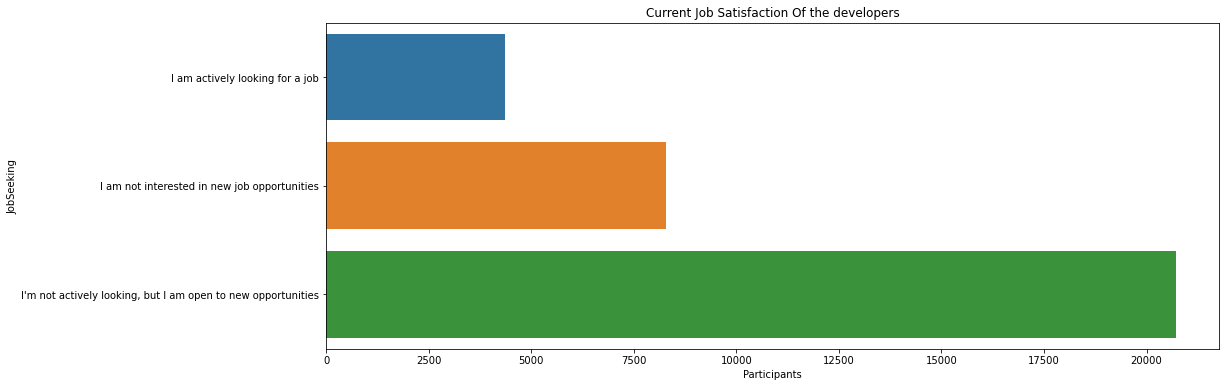

In [34]:
job_seek = df['JobSeekingStatus'].value_counts().reset_index()
job_seek.columns = ['JobSeeking','Participants']
job_seek = job_seek.sort_values(by='JobSeeking').reset_index()
job_seek['per'] = (job_seek['Participants']/np.sum(job_seek['Participants']))*100
plt.figure(figsize=(16,6))
plt.title("Current Job Satisfaction Of the developers")
bar = sns.barplot(data = job_seek,x = 'Participants',y = 'JobSeeking')


# **Summing Up-**

In this article, we came to know about different aspects of development as a career, according to StackOverflow 2017 survey's result.

**1.** We looked at the recommendation made by the present developers for breaking into the field, most of which recommended to use online courses.

**2.** Then, we looked at the language the developers are using and, which one is in demand in industries. Javascript was the most used and in-demand language.

**3.** Afterwards, we got a look at what role does salary plays in job satisfaction of a developer.